# Problem Statement

# Perform sentimental analysis:
Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
tweets = pd.read_csv(r"C:\Users\HP\Downloads\Elon_musk (1).csv",encoding='cp1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


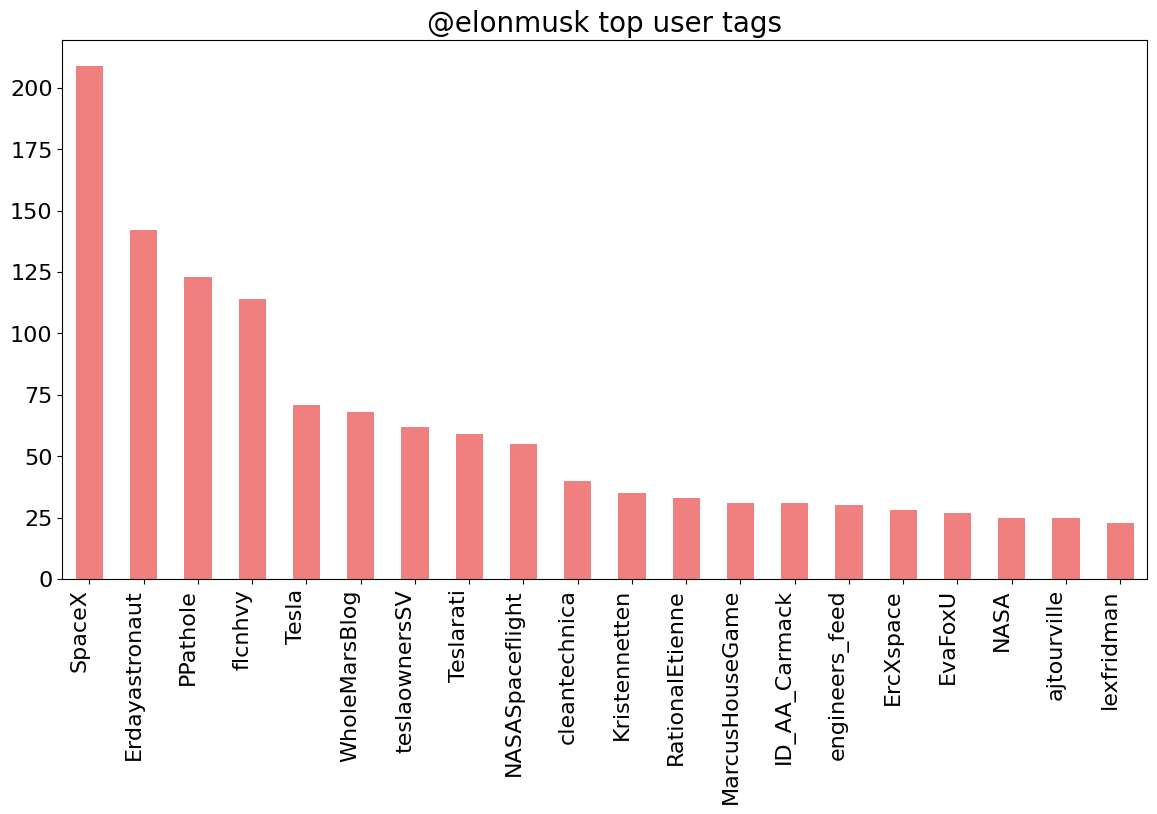

In [4]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

# BasicText Preprocessing
Cleaning the text by removing irrelevant information

In [5]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(11)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


# Word Frequency

In [6]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
Name: count, dtype: int64

# Removing Stopwords


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [12]:
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
Name: count, dtype: int64

# Basic Feature Extaction
Count vectoriser tells the frequency of a word.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(tweets["Text"])
feature_names = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({
    'term': feature_names, 
    'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()
})

word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

word_freq_df.head(11)


,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


# TFIDF - Term frequency inverse Document Frequencyt

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()

dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=names_features)
df


,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

# Bi-gram

In [18]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [19]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


# Bi-gram plot

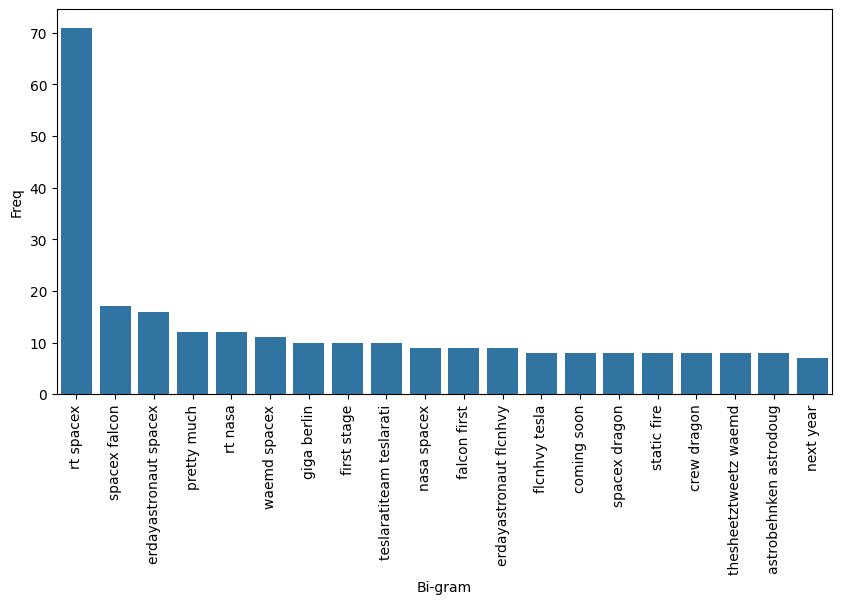

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Tri-gram

In [21]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


# Tri-gram plot

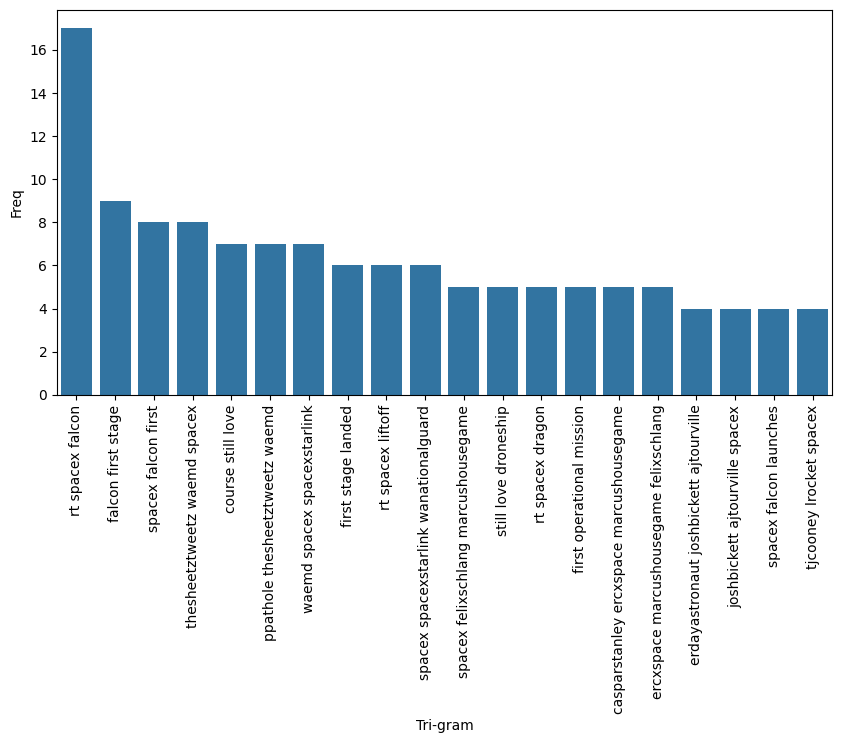

In [23]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Creating a Worlcloud

In [24]:
string_Total = " ".join(tweets["Text"])

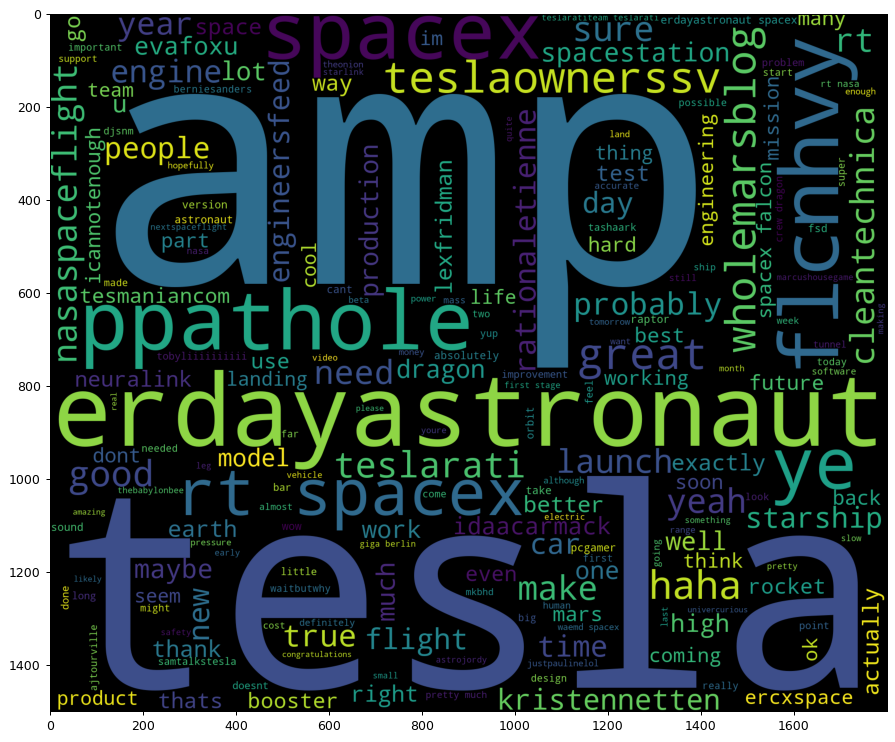

In [25]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

# Subjectivity and Polarity

In [27]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 297.7 kB/s eta

In [28]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [29]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


# Creating a Worlcloud

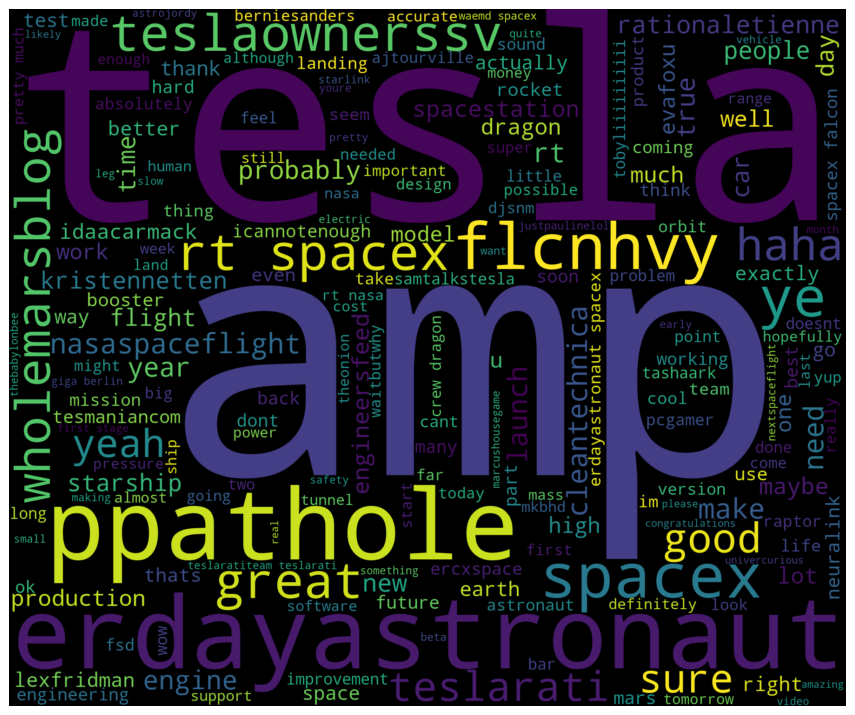

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [31]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [32]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [33]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


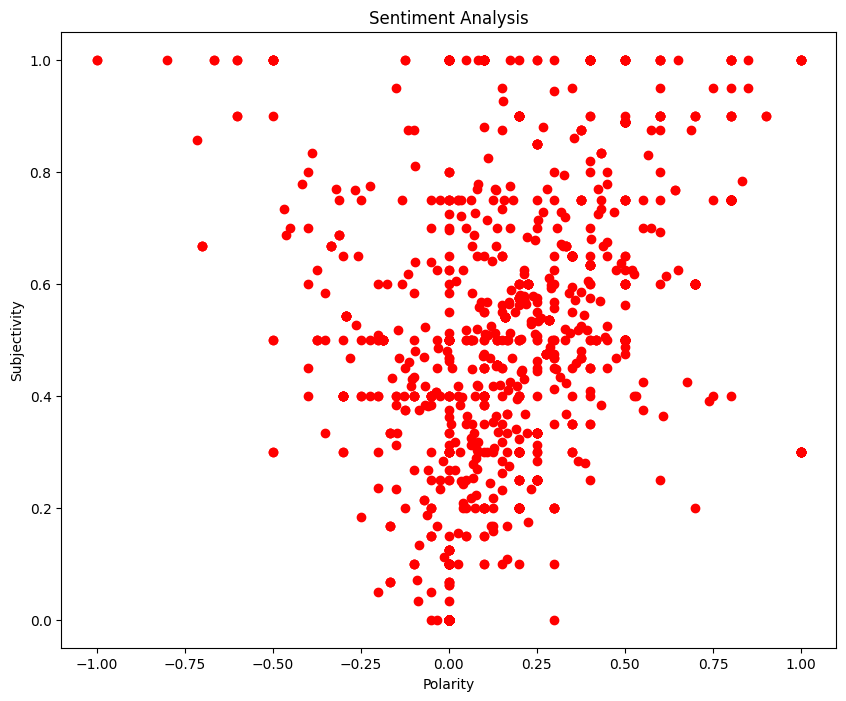

In [34]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [35]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

# Perform sentimental analysis:

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [36]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [37]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [38]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [39]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [40]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [41]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,Reviewed in India on 24 February 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,Reviewed in India on 9 February 2024
2,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",Reviewed in India on 28 February 2024
3,5.0 out of 5 stars\nVery good product,5.0,Initially thought it was dark blue but then ki...,Reviewed in India on 22 February 2024
4,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,Reviewed in India on 30 May 2023
...,...,...,...,...
105,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,Reviewed in India on 20 November 2023
106,5.0 out of 5 stars\nGood looking,5.0,Nice product,Reviewed in India on 27 January 2024
107,5.0 out of 5 stars\nGood product,5.0,Good product,Reviewed in India on 14 February 2024
108,5.0 out of 5 stars\nInbuild Alexa,5.0,Very large display,Reviewed in India on 26 January 2024


In [42]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [43]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,24 February 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
3,5.0 out of 5 stars\nVery good product,5.0,Initially thought it was dark blue but then ki...,22 February 2024
4,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
5,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
7,4.0 out of 5 stars\nBettary life good,4.0,Face pic not allowed in face watch and working...,5 February 2024
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [44]:
df.to_csv("BoatSmartWatch_Review.csv")

# Load Dataset

In [46]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,24 February 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
3,5.0 out of 5 stars\nVery good product,5.0,Initially thought it was dark blue but then ki...,22 February 2024
4,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
...,...,...,...,...
105,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,20 November 2023
106,5.0 out of 5 stars\nGood looking,5.0,Nice product,27 January 2024
107,5.0 out of 5 stars\nGood product,5.0,Good product,14 February 2024
108,5.0 out of 5 stars\nInbuild Alexa,5.0,Very large display,26 January 2024


In [47]:
reviews.Rating.describe()

count    110.000000
mean       4.109091
std        0.610992
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [48]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [49]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [50]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,24 February 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
3,5.0 out of 5 stars\nVery good product,5.0,Initially thought it was dark blue but then ki...,22 February 2024
4,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023


# Data Visualization
Date vs Review Count

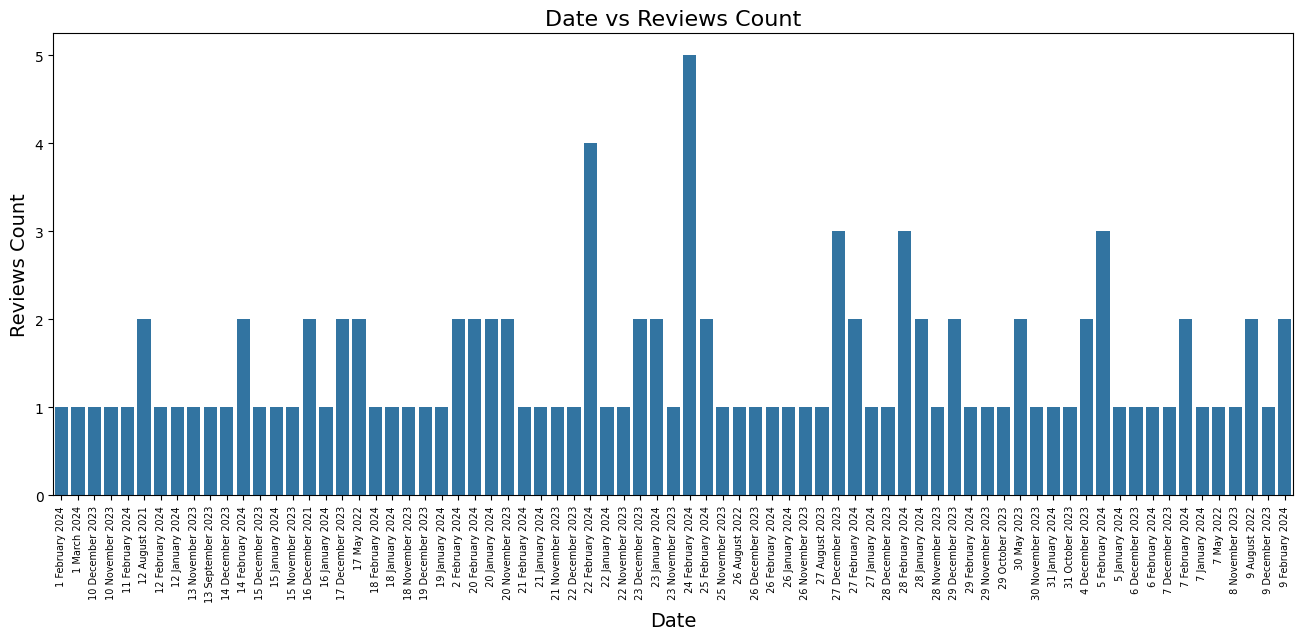

In [52]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of Ratings

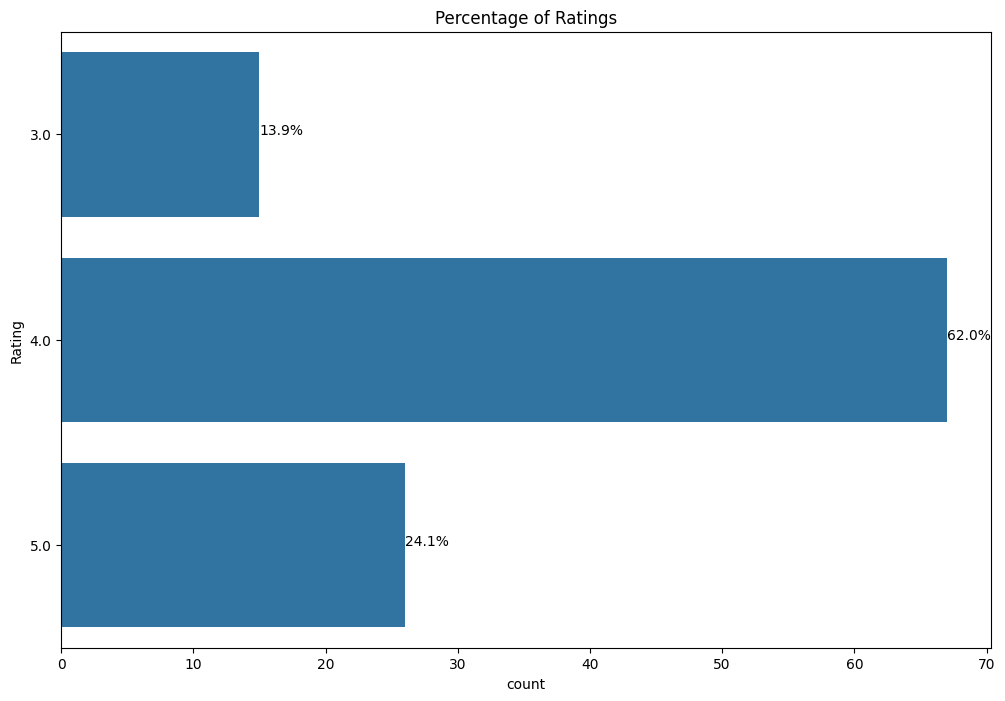

In [53]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# BasicText Preprocessing for Sentiment Analysis
Spelling Correction

In [55]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))


0                        Lowest price and good quality
1    His smart watch is good value for money 💰. And...
2    Easy to operate,good looks,good design,light w...
3    Initially thought it was dark blue but then ki...
4    By experience with the boot Tend All Plus Smar...
Name: Review, dtype: object

In [56]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Lowest price and good quality
1,This smart watch is good value for money 💰. An...
2,"Easy to operate,good looks,good design,light w..."
3,Initially thought it was dark blue but then ki...
4,My experience with the boAt Xtend Call Plus Sm...
...,...
105,Worst watch . Worst service. Application got h...
106,Nice product
107,Good product
108,Very large display


# Resetting index

In [57]:
boat_review.reset_index(drop=True, inplace=True)

In [58]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# Lemmatizer

In [61]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [62]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/108 [00:00<?, ?it/s]

In [63]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...


# Text Pre-processing Techniques
A. Removing '@names'

In [64]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [65]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


B. Removing links (http | https)

In [66]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


C. Removing Review with empty text

In [67]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


D. Dropping duplicate rows

In [68]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


E. Function to remove emoji

In [69]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [70]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


F. Removing Stop words

In [72]:
with codecs.open(r"C:\Users\HP\Downloads\stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [73]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [74]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


G. Tokenize 'Clean_Reviews'

In [75]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'watch', 'good', 'value', 'money', 'feature', 'packed', 'product', 'ip', 'rated', 'bought', 'month', 'ago', 'still', 'work', 'fine', 'thing', 'found', 'bad', 'vibration', 'sensor', 'satisfying', 'also', 'bit', 'laggy'])

In [76]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                       [lowest, price, good, quality]
1    [smart, watch, good, value, money, feature, pa...
2    [easy, operate, good, look, good, design, ligh...
3    [initially, thought, dark, blue, kind, light, ...
4    [experience, boat, xtend, call, plus, smart, w...
5    [skipping, part, mostly, covered, review, spon...
6    [medium, could, loaded, used, watch, month, bo...
7    [face, pic, allowed, face, watch, working, bes...
8    [review, overviewaverage, boat, today, launche...
9    [pro, premium, build, quality, matte, finishin...
Name: Clean_Reviews, dtype: object

In [77]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,lowest price good quality,lowest price good quality,"[lowest, price, good, quality]"
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa..."
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig...","[easy, operate, good, look, good, design, ligh..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...,"[initially, thought, dark, blue, kind, light, ..."
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...,"[face, pic, allowed, face, watch, working, bes..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."


# H. Converting words to Stemmer

In [78]:
stemmer = SnowballStemmer("english")

In [79]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,lowest price good qualiti
1,smart watch good valu money featur pack produc...
2,easi oper good look good design light weight b...
3,initi thought dark blue kind light blue deliv ...
4,experi boat xtend call plus smart watch somewh...
...,...
103,worst watch worst servic applic got hang due w...
104,nice product
105,good product
106,larg display


# I. Converting words to Lemma

In [81]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,lowest price good quality
1,smart watch good value money feature packed pr...
2,easy operate good look good design light weigh...
3,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...
...,...
103,worst watch worst service application got hang...
104,nice product
105,good product
106,large display


# Basic Feature Extaction

A. Applying bag of Words without N grams

In [82]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [84]:
print(cv.get_feature_names_out()[109:200])

['bazei' 'beautiful' 'bed' 'beginning' 'believe' 'beneficial'
 'benefitsnow' 'best' 'better' 'beyond' 'bezel' 'big' 'bike' 'bip'
 'birthday' 'bit' 'black' 'bloated' 'blood' 'blue' 'bluetooth' 'boat'
 'body' 'bother' 'bought' 'box' 'boyfriend' 'bp' 'bpm' 'break' 'breath'
 'breathing' 'bright' 'brightness' 'brings' 'browsing' 'brushed' 'bt'
 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burn' 'burnt' 'button'
 'buy' 'buyer' 'buying' 'cable' 'cache' 'calculated' 'calculating'
 'calculation' 'calculator' 'calender' 'call' 'called' 'caller' 'callin'
 'calling' 'calorie' 'calory' 'cals' 'camera' 'cannot' 'carddesign' 'care'
 'case' 'category' 'catering' 'center' 'centerbefore' 'chahiye' 'change'
 'changed' 'charge' 'charger' 'charging' 'charm' 'cheap' 'check' 'checked'
 'checking' 'chennai' 'child' 'childish' 'chinese' 'chipped' 'choice']


In [86]:
print(cv.get_feature_names_out()[:100])

['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accessibility' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'ackward' 'acticity' 'activate' 'activating' 'active' 'activites'
 'activity' 'actual' 'actually' 'adapter' 'add' 'added' 'addition'
 'adjust' 'advanced' 'advertised' 'aggregate' 'ago' 'alarm' 'alert'
 'alexa' 'allowed' 'allowing' 'allows' 'almost' 'along' 'also'
 'alternative' 'aluminium' 'always' 'amaze' 'amazfit' 'amazing' 'amazon'
 'amoled' 'amount' 'analog' 'android' 'angle' 'animal' 'animation'
 'anniversary' 'another' 'answer' 'anyone' 'anyonefor' 'anything'
 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'application'
 'apps' 'appyou' 'around' 'arre' 'asakte' 'aside' 'asks' 'aspect'
 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'aur' 'auto' 'available' 'avarage' 'av

In [87]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [88]:
dataframe = dataframe.reset_index(drop=True)

In [89]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/108 [00:00<?, ?it/s]

In [90]:
corpus[3]

'initi thought dark blue kind light blue deliv also good'

# Applying Countvectorizer (Creating the Bag of Words model)

In [92]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [93]:
X.shape

(108, 1546)

In [95]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [96]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [98]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,would recommend go,wrist,xtend,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,yt one,yt one add
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,2,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C. TF-IDF Vectorizer

In [99]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/108 [00:00<?, ?it/s]

In [100]:
corpus[4]

'experi boat xtend call plu smart watch somewhat ok ok earn middl road rate offer use featur build qualiti leaf much desir especi consid price rang start posit hd display impress provid clear visual easi navig multipl watch face advanc bt call conveni allow take call directli watch inclus hr spo track benefici monitor health metric howev found build qualiti smartwatch dial case disappoint made plastic give cheap appear particularli given price rang mani smartwatch market offer metal build dial case similar price point make aspect notabl drawback inclus enx tech multipl sport mode add versatil smartwatch cater differ fit activ support english hindi languag nice touch ensur easi access user conclus boat xtend call plu smart watch use featur decent display averag build qualiti plastic dial case signific downsid price rang expect premium feel build materi smartwatch market offer better build qualiti featur similar cost priorit sturdi stylish design may worth explor altern option make purch

# Applying TF-IDF Vectorizer

In [101]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [102]:
X.shape

(108, 1546)

In [103]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [104]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [106]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,would recommend go,wrist,xtend,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,yt one,yt one add
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.047379,0.0,0.0,0.0,0.0,0.0,0.041011,0.0,...,0.0,0.0,0.094759,0.120491,0.120491,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


D. Named Entity Recognition (NER)

In [107]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'lowest price good quality smart watch good value money feature packed product ip rated bought month ago still work fine thing found bad vibration sensor satisfying also bit laggy easy operate good look good design light weight best gift girlfriend lover life partner initially thought dark blue kind light blue delivered also good experience boat xtend call plus smart watch somewhat ok ok earning middle road rating offer useful feature build quality leaf much desired especially considering price range starting positive hd display impressive providing clear visuals easy navigation multiple watch face advanced bt calling convenient allowing take call directly watch inclusion hr spo tracking beneficial monitoring health metric however found build quality smartwatch dial case disappointing made plastic give cheap appearance particularly given price range many smartwatches market offer metal build dial case similar price point making aspect notable drawback inclusion enx tech multiple sport 

# Parts Of Speech (POS) Tagging

In [108]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [109]:
for token in doc_block[:50]:
    print(token,token.pos_)

lowest ADJ
price NOUN
good ADJ
quality NOUN
smart ADJ
watch VERB
good ADJ
value NOUN
money NOUN
feature NOUN
packed VERB
product NOUN
ip NOUN
rated VERB
bought VERB
month NOUN
ago ADV
still ADV
work VERB
fine ADJ
thing NOUN
found VERB
bad ADJ
vibration NOUN
sensor NOUN
satisfying VERB
also ADV
bit NOUN
laggy ADJ
easy ADV
operate VERB
good ADJ
look NOUN
good ADJ
design NOUN
light NOUN
weight NOUN
best ADJ
gift NOUN
girlfriend NOUN
lover NOUN
life NOUN
partner NOUN
initially ADV
thought VERB
dark ADJ
blue ADJ
kind NOUN
light ADJ
blue NOUN


# Filtering the nouns and verbs only

In [110]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['tech', 'sport', 'mode', 'add', 'versatility', 'smartwatch', 'catering', 'fitness', 'activity', 'support', 'language', 'touch', 'ensuring', 'accessibility', 'user', 'conclusion', 'boat', 'xtend', 'call', 'watch', 'feature', 'display', 'build', 'quality', 'plastic', 'dial', 'case', 'price', 'range', 'expected', 'premium', 'feel', 'build', 'material', 'smartwatches', 'market', 'offer', 'build', 'quality', 'feature', 'cost', 'prioritize', 'design', 'exploring', 'option', 'making', 'purchase', 'skipping', 'part', 'covered', 'review', 'sponsored', 'one', 'add', 'sense', 'disappointment', 'noticed', 'day', 'usage', 'watch', 'show', 'date', 'day', 'week', 'show', 'hour', 'min', 'way', 'configure', 'analog', 'view', 'turned', 'exercise', 'activity', 'walking', 'screen', 'go', 'go', 'walk', 'calory', 'count', 'home', 'screen', 'show', 'step', 'count', 'calorie', 'burnt', 'exercise', 'activity', 'e', 'step', 'cals', 'cycling', 'show', 'home', 'screen', 'entry', 'app', 'addition']


# Counting the noun & verb tokens

In [111]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,195
1,boat,93
2,feature,74
3,time,63
4,smartwatch,54
5,day,50
6,display,46
7,xtend,45
8,app,45
9,work,44


# Visualizing results (Barchart for top 10 nouns + verbs)

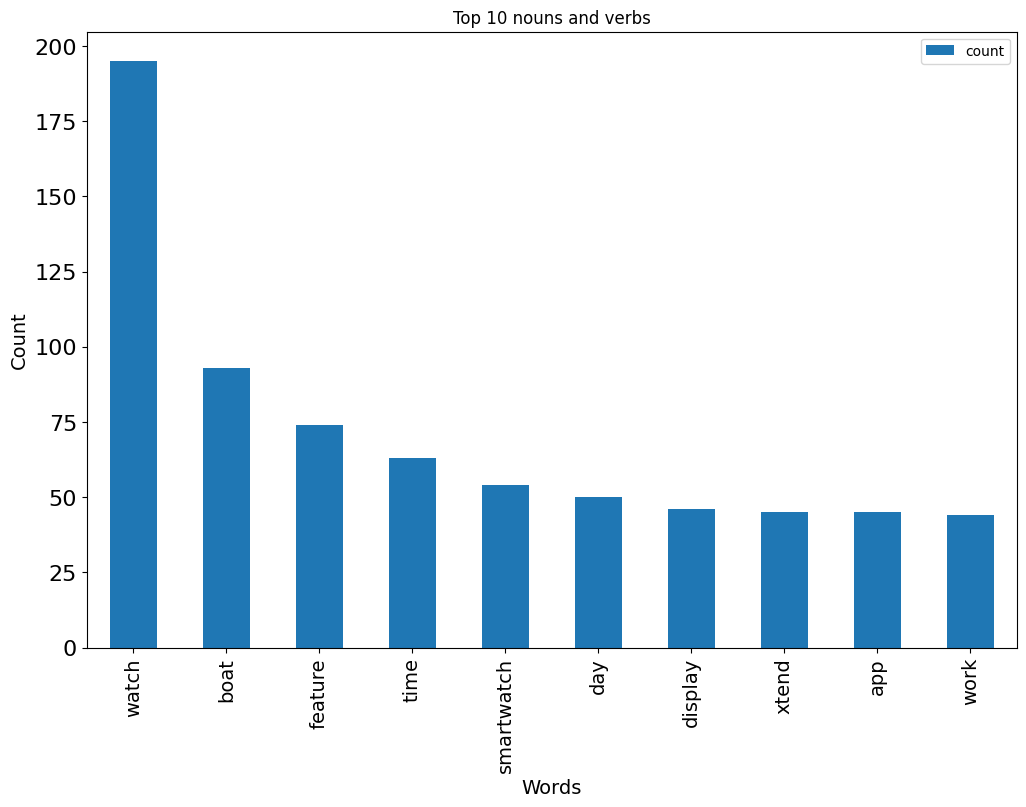

In [113]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Feature Extraction
A. BOW Features

In [114]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

B. TF-IDF Features

In [115]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# Fetch sentiments Using TextBlob

In [116]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [118]:
# sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,103
neg,5


# Let's calculate subjectivity and Polarity

In [119]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,lowest price good quality,lowest price good quality,"[lowest, price, good, quality]",0.600000,0.700000
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa...",0.681905,0.226190
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig...","[easy, operate, good, look, good, design, ligh...",0.606667,0.646667
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...,"[initially, thought, dark, blue, kind, light, ...",0.400000,0.221429
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w...",0.479338,0.224468


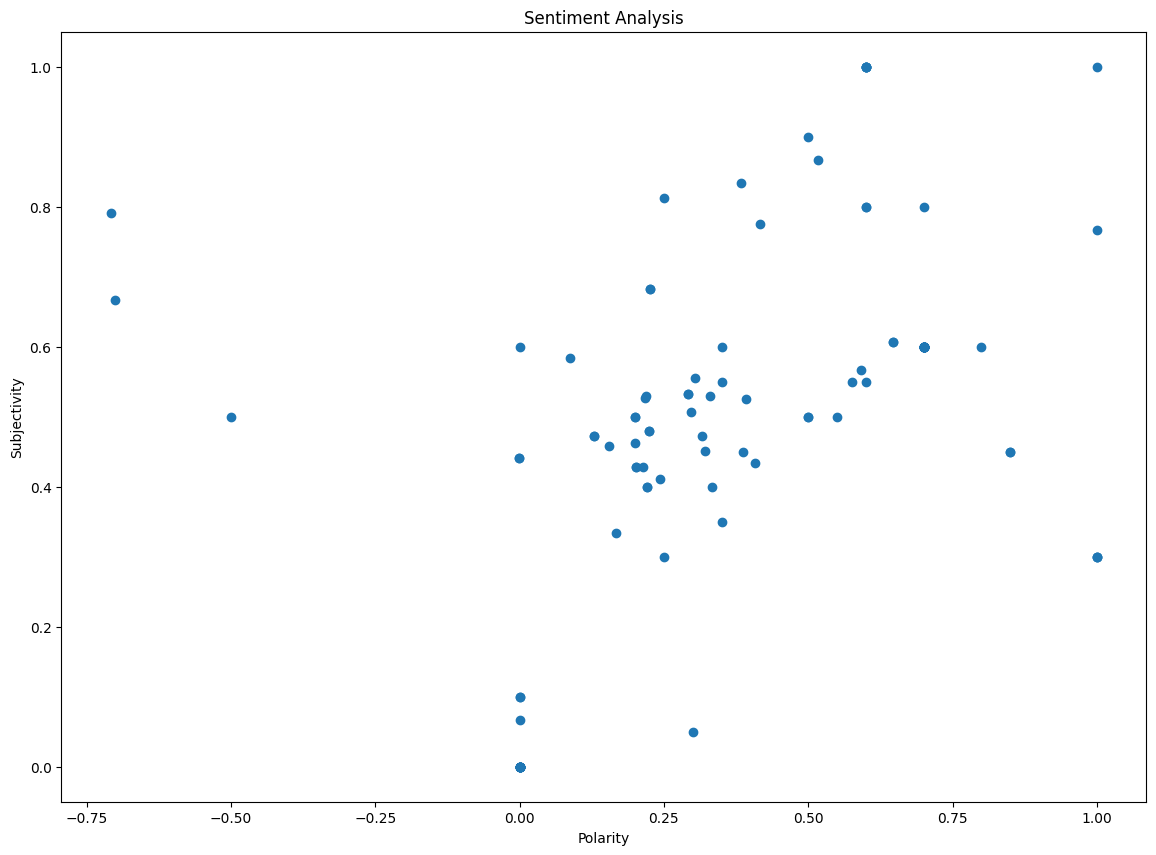

In [120]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [121]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,lowest price good quality,lowest price good quality,"[lowest, price, good, quality]",0.600000,0.700000,pos
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa...",0.681905,0.226190,pos
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig...","[easy, operate, good, look, good, design, ligh...",0.606667,0.646667,pos
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...,"[initially, thought, dark, blue, kind, light, ...",0.400000,0.221429,pos
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w...",0.479338,0.224468,pos


# Story Generation and Visualization

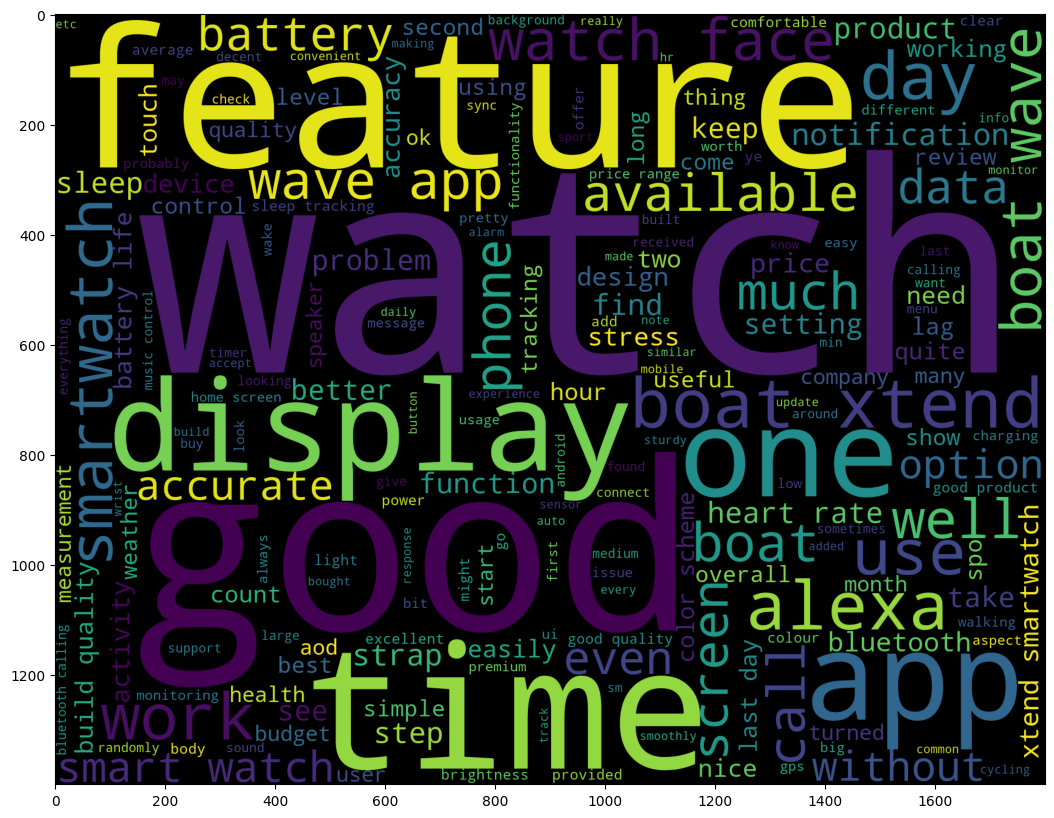

In [122]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

A. Most common words in positive Review

In [123]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

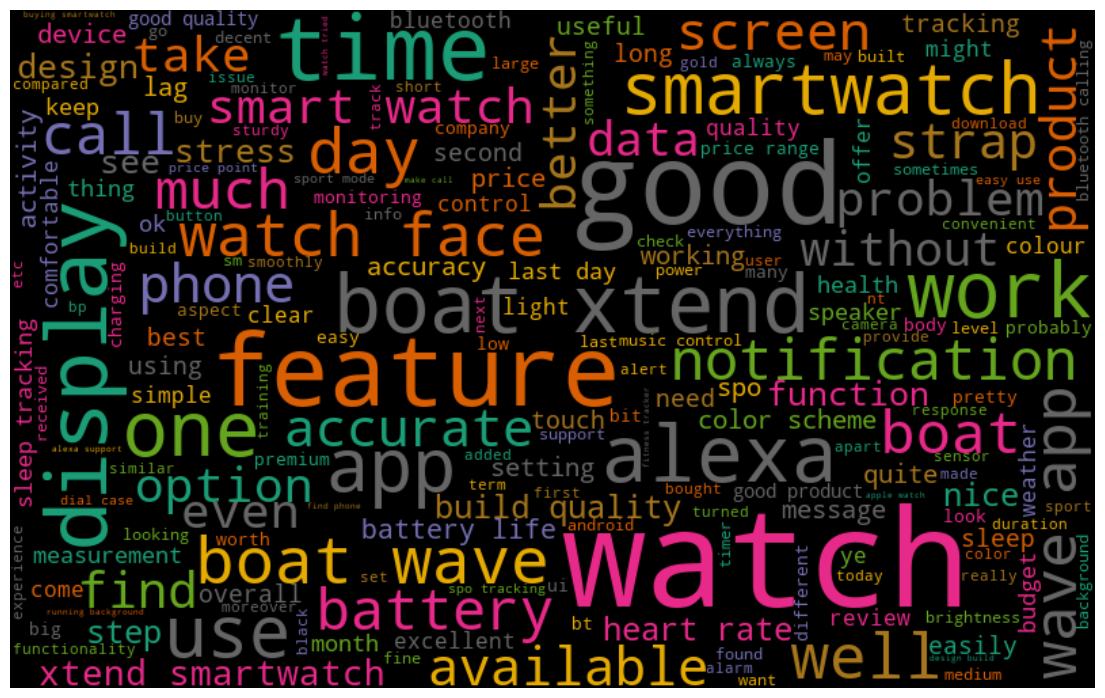

In [124]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

B. Most common words in negative Review

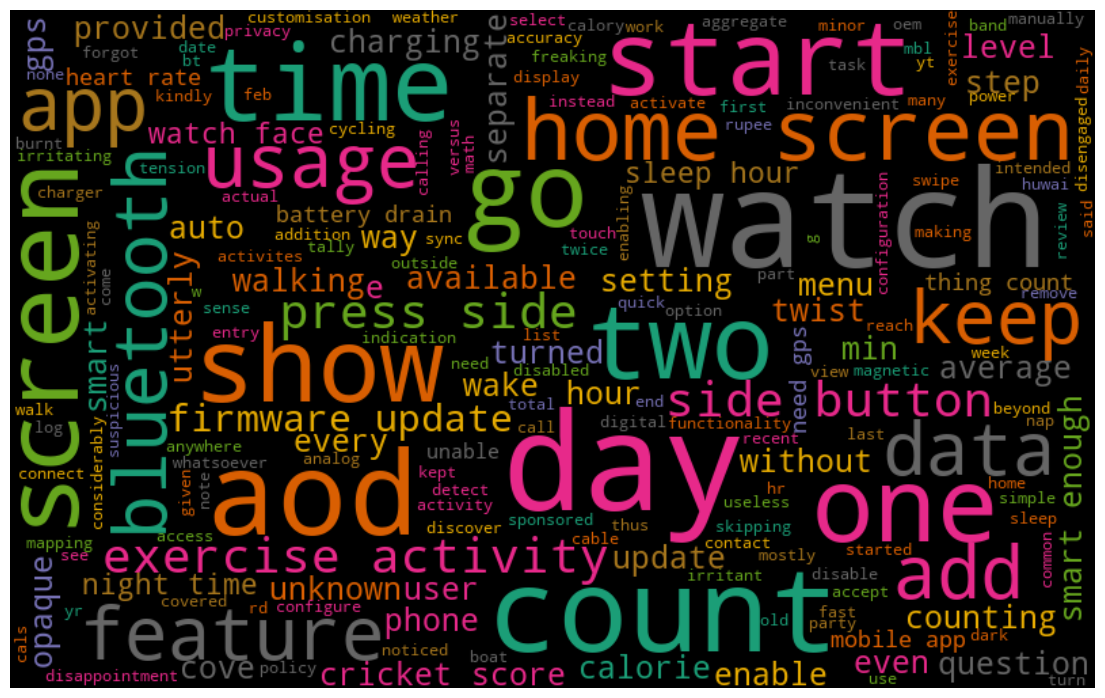

In [125]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

# The END !!!